# 宠物品种

Shift+Enter 运行一个单元

### 1. 每一个notebook都以这三行代码开始：

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%开头的代码是对Jupyter Notebook的特殊指令，不是python代码，它们被称作“magic”

如果程序执行时有人修改了依赖库的代码，自动重新加载库
如果有人要求画出一些内容，就把它们画在Jupyter Notebook上

### 2. 接下来的两行引入了fastai库：

In [3]:
from fastai import *
from fastai.vision import *

目前fastai库支持四种应用:

- 计算机视觉
- 自然语言文本
- 表格数据
- 协同过滤


## 3. 数据

主要从这两个地方获取数据:

1. 学术数据集

学术数据集是很重要的。它们很有意义。学者们花费了大量时间搜集整理一个数据集，用来测试各种不同的算法在数据集上的表现。他们设计一个数据集，然后用不同的方式挑战，寻求能够获得突破，得到更好的结果。

2. Kaggle竞赛数据集

这两种数据集都是我们关注的，它们提供了有力的基线，可以很好地评价你做得如何。

**学术上，区分相似分类被叫做细粒度分类（fine grained classification）。**

### 3.1 untar_data

我们要做的第一件事情是下载和解压数据，我们将使用untar_data这个函数，它会自动下载并解压数据

untar_data 会下载数据集到一个方便使用的目录，把数据集解压，返回文件路径。

下次再执行这段代码时，因为数据已经被下载过了，它就不会再被重复下载。因为它已经被解压过了，也就不会再被重复解压。所有的功能都被设计得很简便，很自动化。

In [4]:
path = untar_data(URLs.PETS)
path

WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet')

使用path.ls()来查看数据集的根目录都有哪些目录

In [5]:
path.ls()

[WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/annotations'),
 WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images')]

我们可以为这些目录设置路径的变量，如下代码所示:

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

### 3.2 get_image_files 

get_image_files 可以取到一个包含所有图片路径的数组。

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/wangyunlu/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

文件名的格式是 目录/标签_编号.拓展名。我们要想办法获取到文件名中标签部分的列表， 这样就可以得到标签。

### 3.3 ImageDataBunch

一个ImageDataBunch 代表你创建一个模型所需要的所有数据，使用工厂方法可以很方便得创建一个包含训练集和验证集的ImageDataBunch，训练集和验证集里都包含图片和标签。


#### 3.3.1 正则化

通过使用ImageDataBunch的from_name_re函数通过正则表达式的方式来从图像名称中提取标签

In [8]:
pat = r'/([^/]+)_\d+.jpg$'

|  正则表达式   | 解释  |
|  :------------:  | :----:  |
| $  | 匹配字符串结尾 |
| .jpg  | 表示字符串最后的的字符，这里表示文件的格式 |
| \d | 匹配数字，+表示匹配前一个字符1次或者无限次|
| _ | 数字开始前的下划线 |
|（） | 表示一组字符 |
| [] | 表示字符集 |
| ^/ | ^在中括号中表示取反，^/表示除了/的所有字符 |
| ( [ ^/ ] + ) | 表示除了/的任意字符串 |
| / | 表示最开始的/ |
| r | 表明字符串为原始字符串,否则\d就需要写成\\d,否则python无法解析 |


#### 3.3.2 python re检验正则表达式


In [8]:
import re
temp_name = "/data/oxford-iiit-pet/images/german_shorthaired_105.jpg"
pat = r'/([^/]+)_\d+.jpg$'
pat = re.compile(pat)
print(pat.search(temp_name).group())
print(pat.search(temp_name).group(1))

/german_shorthaired_105.jpg
german_shorthaired


#### 3.3.3 from_name_re

In [9]:
import warnings
warnings.filterwarnings("ignore")

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\wangyunlu\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,great_pyrenees,Persian,Persian,chihuahua
Path: C:\Users\wangyunlu\.fastai\data\oxford-iiit-pet\images;

Test: None

from_name_re这个工厂方法，我们可以传入这些参数

- path_img：存放图片的目录
- fnames：存放文件名的列表
- pat：从文件名中提取标签的正则表达式
- ds_tfm： 变形，我们稍后再讲
- size：你想处理的图片的尺寸


ImageDataBunch.from_name_re 将会返回一个dataBunch对象。在fastai里，所有你用来建模的东西都是一个DataBunch对象。DataBunch对象基本上会包含2个或者3个数据集：训练数据、验证数据，有时会有测试数据。每一个都包含图片和标签，或者文本和标签，或者表格和标签，等等。它们都被放在一个地方(比如 data)。

一个需要多说明一点的是标准化（normalization）。在几乎所有机器学习任务里，你需要让数据有相同的“尺寸”，就是说有相同的平均值和标准差。所以fastai里有一个标准化函数，我们可以用这样的方式来标准化数据。

### 4. data.show_batch

data.show_batch可以显示data bunch里的内容。可以看出，这些图片都被恰当地缩放或者裁剪过。这种方法叫中心裁剪，它抓取出图片的中间部分，然后调整图片尺寸。它基本上是裁剪和调整尺寸两种方法的组合。

我们也会用它来做数据增强（data augmentation）。对于裁剪多少和在哪里裁剪之类的问题，是有些随机性的。

基本思路是裁剪、缩放和设置边距。做数据增强时，根据不同情况有很多不同的方式，

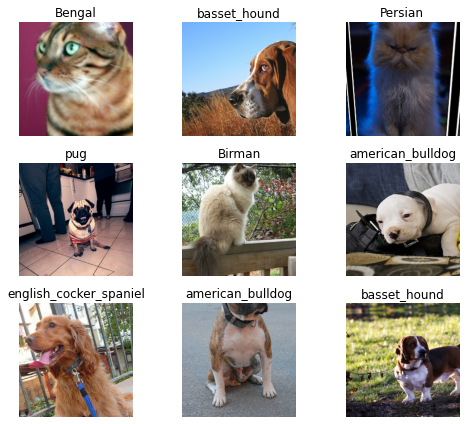

In [17]:
data.show_batch(rows=3, figsize=(7,6))

### 5. 查看标签

所有可能的标签都是一种分类，使用DataBunch，你可以打印data.classes

In [18]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

### 6. 训练:  利用resnet框架训练模型

在fastai里我们使用“learner”来训练模型。

- DataBunch：一个fastai里广泛使用的概念，代表你的数据。对具体的应用，有对应的子类，比如ImageDataBunch
- Learner：一个fastai里广泛使用的概念，代表学习拟合一个模型的操作。 在各种具体的应用中有很多对应的子类，用来简化使用，比如有一个convnet learner，可以用来创建一个卷积神经网络。

In [10]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\wangyunlu/.cache\torch\checkpoints\resnet34-333f7ec4.pth


create_cnn方法存在于fastai.vision.learner类中。
在fastai中，模型是由学习者训练的，create_cnn只接受很少的参数，
- 首先是DataBunch数据对象，
- 然后是模型resnet34，
- 最后传递的是指标列表。


当首次调用时候会下载resnet34的预训练模型，**预训练**是指这个特定的模型已经为特定的任务进行了训练，当前这个预训练模型是使用Imagenet图像数据集进行训练得到的。所以我们不一定要从一个对图像一无所知的模型开始，而是从1000个类别的图像开始。

也就是**迁移学习 Transfer learning**

#### 6.1 过拟合

我们必须确认我们没有过拟合。使用**验证数据集可以检查有没有过拟合**。验证集是你的模型没有使用过的一组图片。基于验证集的度量值（比如错误率）被自动地打印出来。当我们创建data bunch时，它会自动创建一个验证集。我们将学习很多种创建和使用验证集的方法。因为我们尝试集成所有最佳实践，你几乎无法不使用验证集。因为如果你不使用验证集，你就不知道你是否过拟合。所以我们总是打印出验证集的度量。我们总是保证模型不接触到验证集。这些都是已经实现了的，这些方法都已经被集成在data bunch对象中。

#### 6.2 应用one-cycle-policy

one-cycle-policy, 使用的是一种周期性学习率，从较小的学习率开始学习，缓慢提高至较高的学习率，然后再慢慢下降，周而复始，每个周期的长度略微缩短，在训练的最后部分，学习率比之前的最小值降得更低。这不仅可以加速训练，还有助于防止模型落入损失平面的陡峭区域，使模型更倾向于寻找更平坦部分的极小值，从而缓解过拟合现象。

One-Cycle-Policy 大概有三个步骤：

- 我们逐渐将学习率从 lr_max / div_factor 提高到 lr_max，同时我们逐渐减少从 mom_max 到 mom_min 的动量 (momentum)。

- 反向再做一次：我们逐渐将学习率从 lr_max 降低到 lr_max / div_factor，同时我们逐渐增加从 mom_min 到 mom_max 的动量。

- 我们进一步将学习率从 lr_max / div_factor 降低到 lr_max /（div_factor x 100），我们保持动力稳定在 mom_max。



In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.434623,0.702736,0.184032,19:31
1,0.588862,0.630807,0.168471,19:18
2,0.399128,0.287710,0.086604,19:21
3,0.210584,0.239438,0.078484,19:17


#### 6.2 保存模型权重

这一步非常重要，因为你需要在下次运行代码时重新加载权重

In [19]:
learn.save('stage-1')



### 7. 结果

#### 7.1 分类任务解释类（ClassificationInterpretation）

想看看结果如何，我们可以使用这个分类任务解释类（ClassificationInterpretation）。我们使用from_learner这个工厂方法，我们传入一个learn对象。一个learn对象包含了两部分信息：

- 数据是什么
- 模型是什么。现在它不仅是一个结构，它已经是一个训练完成的模型

这是用来解释这个模型所需要的所有信息。

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

#### 7.2 plot_top_losses

**损失函数是用来评价你的预测的效果。**比如说，你为一个猫的图片预测了一个类别，并且非常确信，但事实上你又预测错了，这时就会有一个比较高的损失，因为你对错误答案很确信。这就是损失值比较高的含义。通过画出最高的损失值，我们就可以看到我们最严重的错误是什么，或者对哪个错误答案最确信。

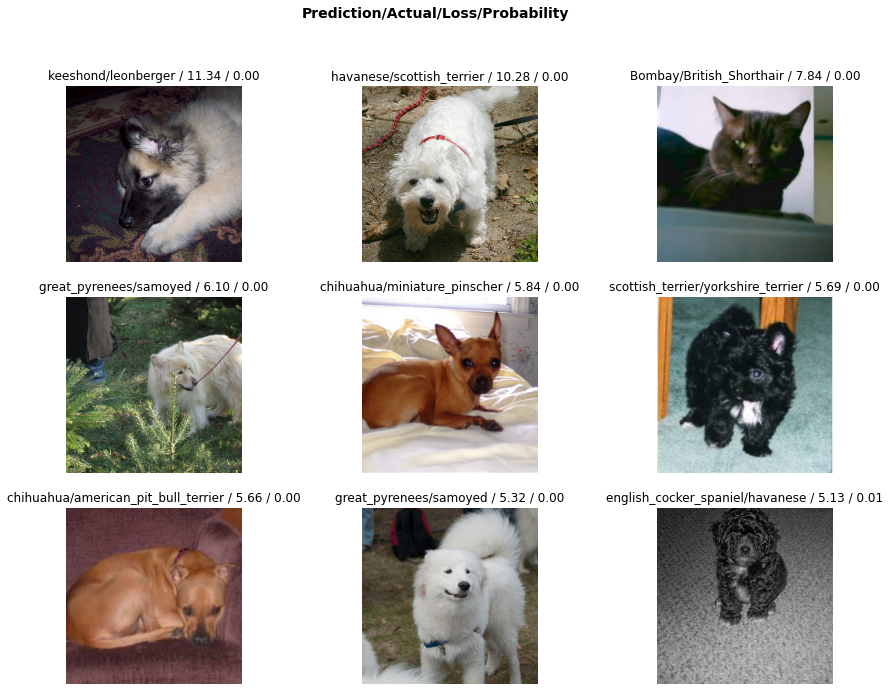

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

所有的图片的题目包含4个信息，分别是：预测类型，真实类型，loss(损失)，真实类型概率

#### 7.3 混淆矩阵

它显示了每一个实际类型的狗或猫，有多少时间模型预测的狗或猫。因为这一次非常准确，它显示了较暗的对角线，对于其他一些错误的组合使用了较亮的数字。

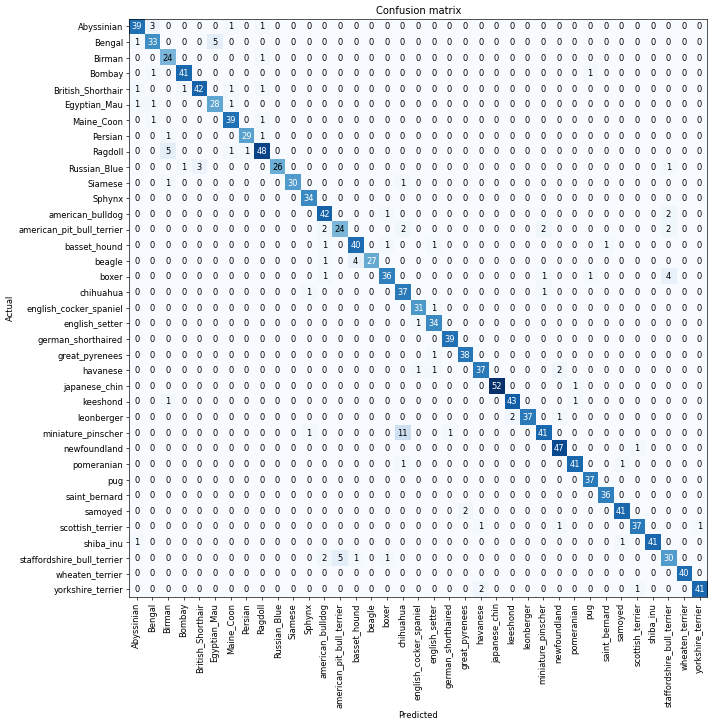

In [22]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

#### 7.4 most_confused()

如果你有很多类，不要使用混淆矩阵。相反，使用fastai的命名函数most_confused()。

most_confused 会抓出混淆矩阵里被预测错次数最多的类别组合。这个例子里 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7)表示:

- 真实品种“american_pit_bull_terrier”
- 预测值“staffordshire_bull_terrier”
- 这个组合出现了7次


In [23]:
interp.most_confused(min_val=2)

[('miniature_pinscher', 'chihuahua', 11),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('beagle', 'basset_hound', 4),
 ('boxer', 'staffordshire_bull_terrier', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'chihuahua', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('havanese', 'newfoundland', 2),
 ('leonberger', 'keeshond', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('yorkshire_terrier', 'havanese', 2)]

### 8. 微调（fine-tuning）
#### 8.1 Unfreezing

到目前为止，我们已经拟合了4个epoch，而且运行得相当快。为什么会这样?因为我们用了一个小技巧——**迁移学习**

我们在那些我们已经训练好的模型后面加入了一些额外的层。我们保持原有的模型不变，只训练额外的层，这样就能训练得很快。如果你想构建的模型和已有的模型相似，这个微调的方法很好用。保留的大部分早期的层，被称为**冻结层（freezing layers）**

**但我们真正想做的是回过头来训练整个模型。**

总是采用两级训练过程：

- 调用ConvLearner的 fit 或者 fit_one_cycle 方法，它只会微调我们加在末尾的一些层，这一步训练地很快，也不会过拟合。
- 为了得到更好得模型，你需要调用 unfreeze。 unfreeze 让它训练整个模型，然后我们再调用一遍fit_one_cycle。

In [24]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.390621,0.349138,0.113667,19:40


#### 8.2 错误率变差的原因

神经网络的层代表了不同的语义复杂度层级。

这就是我们对这个模型的微调没有作用的原因，默认情况下，它以相同的速度训练所有层，

（假设第一层能发现对角，第五层能发现眼睛）就是说它用相同的方式更新代表对角线和渐变的参数和代表眼睛样子这种具体细节的参数。我们要改变这个情况。

改变它之前，我们先把它恢复成原来的样子。我们刚刚破坏了这个模型，它比开始时更差了。

In [25]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\wangyunlu\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,great_pyrenees,Persian,Persian,chihuahua
Path: C:\Users\wangyunlu\.fastai\data\oxford-iiit-pet\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, k

#### 8.3 学习率查找器（Learning rate finder）

我们运行下learning rate finder。它能帮助我们用最快的方式训练模型。

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


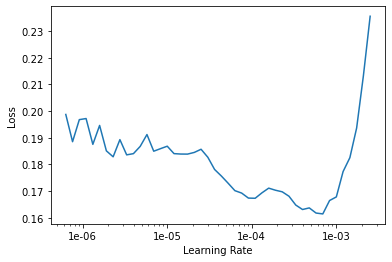

In [27]:
learn.lr_find()
learn.recorder.plot()
# 用cpu跑的

**学习率代表更新模型参数的速度**。x轴代表学习率，学习率逐渐增加。y轴代表损失度。你可以看到，学习率超过10^-4后，损失度变差了。

我们想做些微调，不能使用这么高的学习率。按照学习率探测器的结果，我试着选择1e-6。但是不能用这个来训练所有的层，后面的几层在我们加快速度前也运行得很好。所以我们传入一个学习率的区间到 learn.fit_one_cycle。

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time


使用Python里的 slice关键字，它接收一个起始值和结束值。这样会按照1e-6的学习率训练第一层，按照1e-4的学习率训练最后一层，按照层数等分，每层使用对应的学习率。